<a href="https://colab.research.google.com/github/fabianafranca-boop/notebooks-/blob/main/consumidorgov_dataframe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd, glob, os

pasta = r'/content/drive/MyDrive/MBA USP/MBA USP/TCC 05_08_2025/Arquivo_Professor 05_08_2025'

arquivos = glob.glob(os.path.join(pasta, '**', '*.csv'), recursive=True) \
         +  glob.glob(os.path.join(pasta, '**', '*.CSV'), recursive=True)

if not arquivos:
    raise FileNotFoundError(f'Não encontrei CSVs em: {pasta}')

dfs = []
for arq in arquivos:
    try:
        tmp = pd.read_csv(arq, sep=None, engine='python', encoding='utf-8', on_bad_lines='skip')
    except Exception:
        tmp = pd.read_csv(arq, sep=';', encoding='latin1', on_bad_lines='skip')
    tmp['__arquivo__'] = os.path.basename(arq)
    dfs.append(tmp)

df_unico = pd.concat(dfs, ignore_index=True)

print(f'Arquivos lidos: {len(arquivos)}')
print(f'DF unificado -> {df_unico.shape[0]} linhas x {df_unico.shape[1]} colunas')
print('Colunas:', df_unico.columns.tolist()[:50])  # mostra até 50 para não poluir


Arquivos lidos: 104
DF unificado -> 352114 linhas x 10 colunas
Colunas: ['name_company', 'report_status', 'report_text', 'report_date', 'report_place', 'reponse_company', 'reponse_company_date', 'service_note', 'consumer_consideration', '__arquivo__']


In [ ]:

df_unico.columns.tolist()


['name_company',
 'report_status',
 'report_text',
 'report_date',
 'report_place',
 'reponse_company',
 'reponse_company_date',
 'service_note',
 'consumer_consideration',
 '__arquivo__']

In [ ]:
display(df_unico['report_text'].head())

,report_text
0,Está empresa cobra um valor exorbitante pelo c...
1,Bom dia me chamo Luiz CasemiroMinha conta de á...
2,"Bom dia, conforme relato de problema acima, a ..."
3,Em 28/03/2025 solicitei o encerramento do meu ...
4,"Mais uma vez, fui desrespeitado pela RioMais. ..."


In [ ]:
empresas = df_unico['name_company'].unique().tolist()
empresas


['Rio Mais Saneamento',
 'Enel Distribuição Rio (Ampla)',
 'BRK Ambiental - Região Metropolitana de Maceió',
 'Cemig',
 'Neoenergia Brasília (CEB)',
 'Enel Distribuição São Paulo (Eletropaulo)',
 'Enel DistribuiГ§ГЈo SГЈo Paulo (Eletropaulo)',
 'Neoenergia Coelba',
 'Light',
 'Sabesp',
 'RGE - Rio Grande Energia',
 'Celesc',
 'Copel - Companhia Paranaense de Energia',
 'Comgás - Companhia de Gás de São Paulo',
 'EDP Espírito Santo',
 'Neoenergia Elektro',
 'Energisa Mato Grosso',
 'Equatorial Pará (CELPA)',
 'Neoenergia Cosern',
 'Energisa Rondônia (Ceron)',
 'CPFL Piratininga',
 'Águas de Manaus',
 'Neoenergia Pernambuco (Celpe)',
 'Enel Distribuição Ceará (Coelce)',
 'Corsan',
 'Águas do Imperador',
 'Equatorial Maranhão (CEMAR)',
 'Embasa',
 'CEEE Distribuição',
 'Copasa - Companhia de Saneamento de Minas Gerais',
 'Equatorial Goiás',
 'Equatorial Energia Goiás (antiga Enel Goiás)',
 'Energisa Mato Grosso do Sul ',
 'Sanepar',
 'Energisa Sul-Sudeste ',
 'Equatorial Piauí',
 'BRK Amb

In [ ]:
colunas_vazias = df_unico.isnull().sum()
print("Colunas com valores vazios:")
print(colunas_vazias[colunas_vazias > 0])

print("\nPercentual de valores vazios por coluna:")
percentual_colunas_vazias = (colunas_vazias[colunas_vazias > 0] / len(df_unico)) * 100
print(percentual_colunas_vazias.apply(lambda x: f'{x:.2f}%'))

Colunas com valores vazios:
report_status                 1
reponse_company_date      12859
consumer_consideration        1
dtype: int64

Percentual de valores vazios por coluna:
report_status             0.00%
reponse_company_date      3.65%
consumer_consideration    0.00%
dtype: object


In [ ]:
colunas_nao_vazias = df_unico.notnull().sum()
print("Colunas com valores não vazios:")
print(colunas_nao_vazias[colunas_nao_vazias > 0])

print("\nPercentual de valores não vazios por coluna:")
percentual_colunas_nao_vazias = (colunas_nao_vazias[colunas_nao_vazias > 0] / len(df_unico)) * 100
print(percentual_colunas_nao_vazias.apply(lambda x: f'{x:.2f}%'))

Colunas com valores não vazios:
name_company              352114
report_status             352113
report_text               352114
report_date               352114
report_place              352114
reponse_company           352114
reponse_company_date      339255
service_note              352114
consumer_consideration    352113
__arquivo__               352114
dtype: int64

Percentual de valores não vazios por coluna:
name_company              100.00%
report_status             100.00%
report_text               100.00%
report_date               100.00%
report_place              100.00%
reponse_company           100.00%
reponse_company_date       96.35%
service_note              100.00%
consumer_consideration    100.00%
__arquivo__               100.00%
dtype: object


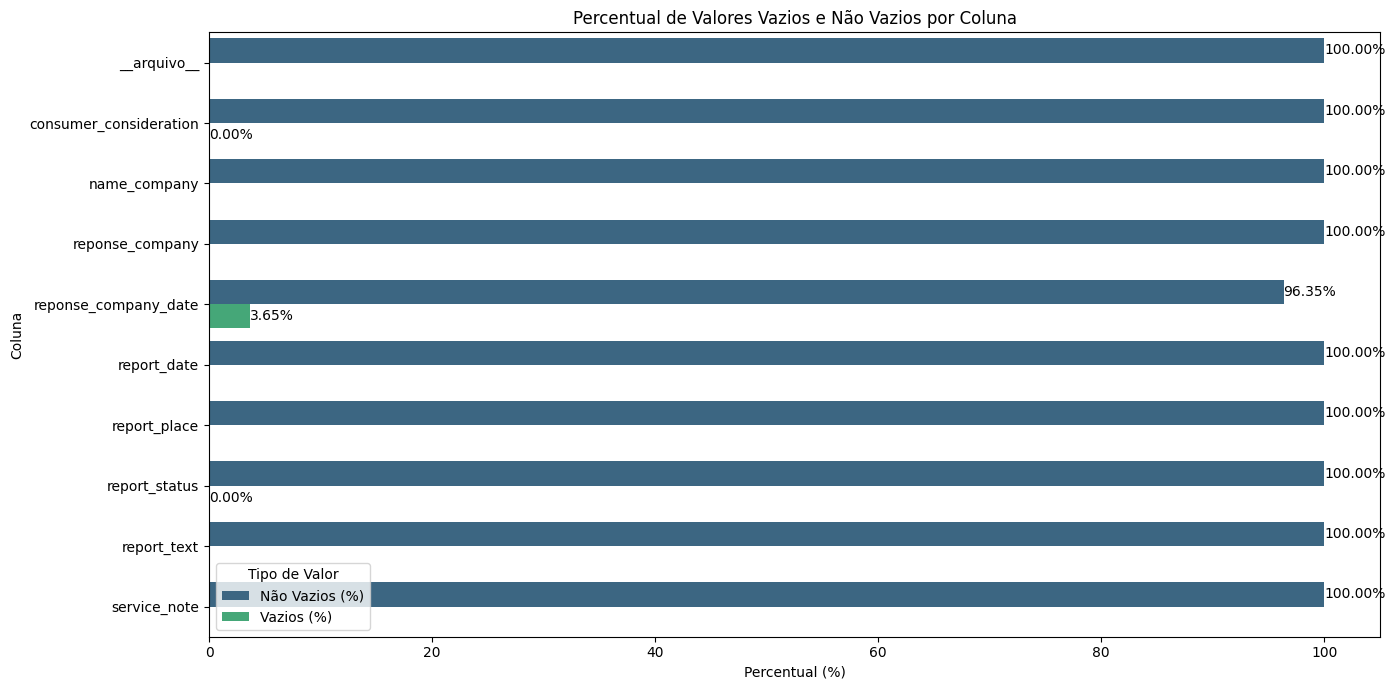

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_percentuais = pd.DataFrame({
    'Não Vazios (%)': percentual_colunas_nao_vazias,
    'Vazios (%)': percentual_colunas_vazias
})

df_percentuais_melted = df_percentuais.reset_index().melt(id_vars='index', var_name='Tipo de Valor', value_name='Percentual')

plt.figure(figsize=(14, 7))

sns.barplot(x='Percentual', y='index', hue='Tipo de Valor', data=df_percentuais_melted, palette='viridis', orient='h')
plt.title('Percentual de Valores Vazios e Não Vazios por Coluna')
plt.xlabel('Percentual (%)')
plt.ylabel('Coluna')
plt.tight_layout()


for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.2f%%', label_type='edge')
plt.show()

In [ ]:
caminho_salvar = '/content/drive/MyDrive/MBA USP/MBA USP/TCC 05_08_2025/percentual_valores_vazios_nao_vazios.png'

try:
    plt.savefig(caminho_salvar)
    print(f"Gráfico salvo com sucesso em: {caminho_salvar}")
except Exception as e:
    print(f"Erro ao salvar o gráfico: {e}")

Gráfico salvo com sucesso em: /content/drive/MyDrive/MBA USP/MBA USP/TCC 05_08_2025/percentual_valores_vazios_nao_vazios.png


<Figure size 640x480 with 0 Axes>

/tmp/ipython-input-3676155153.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentual_colunas_vazias_filtrado.values, y=percentual_colunas_vazias_filtrado.index, palette='viridis', orient='h')


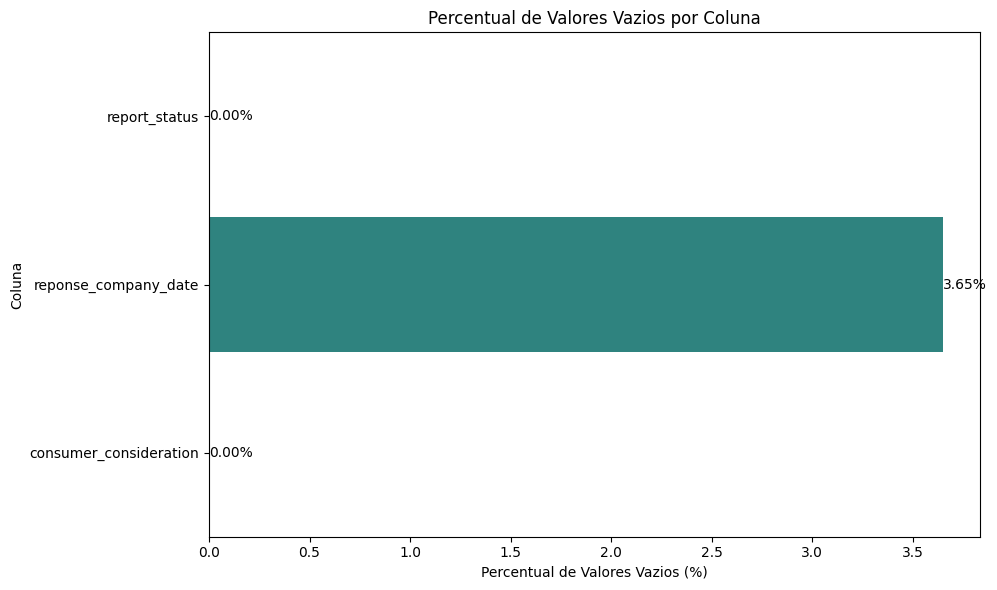

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

percentual_colunas_vazias_filtrado = percentual_colunas_vazias[percentual_colunas_vazias > 0]

plt.figure(figsize=(10, 6))

sns.barplot(x=percentual_colunas_vazias_filtrado.values, y=percentual_colunas_vazias_filtrado.index, palette='viridis', orient='h')
plt.title('Percentual de Valores Vazios por Coluna')
plt.xlabel('Percentual de Valores Vazios (%)')
plt.ylabel('Coluna')
plt.tight_layout()

for index, value in enumerate(percentual_colunas_vazias_filtrado.values):
    plt.text(value, index, f'{value:.2f}%', ha='left', va='center') # Ajustar posição do texto para barras horizontais

plt.savefig('percentual_valores_vazios_por_coluna_horizontal.png')

plt.show()

In [ ]:
total_reclamacoes = len(df_unico)
print(f"O número total de reclamações é: {total_reclamacoes}")

O número total de reclamações é: 352114


In [ ]:
df_unico['report_date'] = pd.to_datetime(df_unico['report_date'], errors='coerce')  # garantir formato de data

reclamacoes_por_ano = df_unico.groupby(df_unico['report_date'].dt.year).size()
reclamacoes_por_ano = reclamacoes_por_ano.sort_index()
reclamacoes_por_ano

,0
report_date,
2014,60
2015,1096
2016,2656
2017,5074
2018,8761
2019,16152
2020,53359
2021,58793
2022,51065


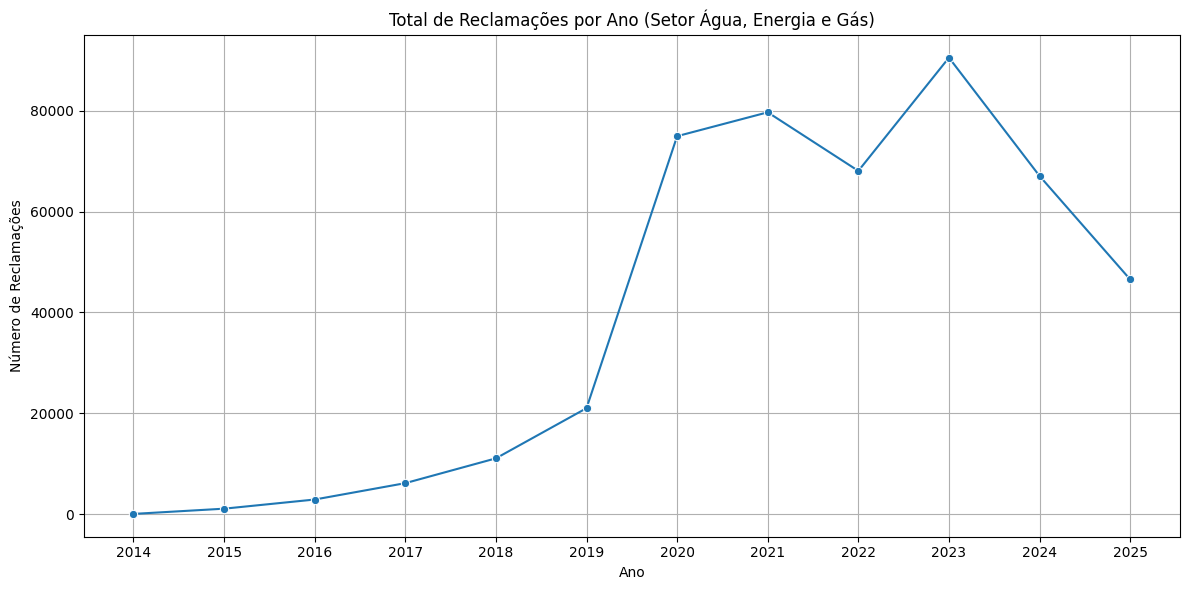

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_unico['report_date'] = pd.to_datetime(df_unico['report_date'], errors='coerce')

reclamacoes_por_ano = df_unico.dropna(subset=['report_date']).groupby(df_unico['report_date'].dt.year).size()

plt.figure(figsize=(12, 6))
sns.lineplot(x=reclamacoes_por_ano.index, y=reclamacoes_por_ano.values, marker='o')
plt.title('Total de Reclamações por Ano (Setor Água, Energia e Gás)')
plt.xlabel('Ano')
plt.ylabel('Número de Reclamações')
plt.grid(True)
plt.xticks(reclamacoes_por_ano.index.astype(int)) # Garantir que os anos sejam inteiros no eixo x
plt.tight_layout()

plt.savefig('total_reclamacoes_por_ano_setor.png')

plt.show()

In [ ]:
from google.colab import files
files.download('consolidado_reclamacoes.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
reclamacoes_por_ano = df_unico.dropna(subset=['report_date']).groupby(df_unico['report_date'].dt.year).size()
ano_mais_reclamacoes = reclamacoes_por_ano.idxmax()
qtd_ano = reclamacoes_por_ano.max()

print(f"O ano com o maior número de reclamações é {int(ano_mais_reclamacoes)} com {qtd_ano} reclamações.")

O ano com o maior número de reclamações é 2023 com 67958 reclamações.


O mês com o menor número de reclamações é September com 32941 reclamações.


/tmp/ipython-input-761167661.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=meses_nomes, y=reclamacoes_por_mes.values, palette='viridis')


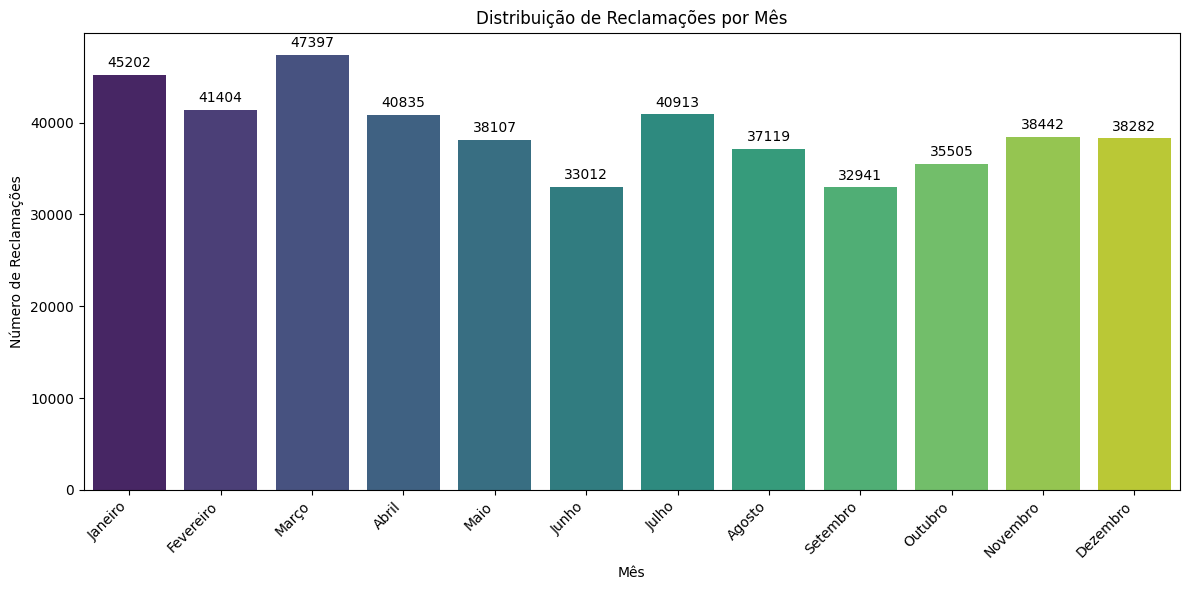

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import calendar

df_unico['report_date'] = pd.to_datetime(df_unico['report_date'], errors='coerce')
reclamacoes_por_mes = df_unico.dropna(subset=['report_date']).groupby(df_unico['report_date'].dt.month).size()

mes_menos_reclamacoes = reclamacoes_por_mes.idxmin()
qtd_mes = reclamacoes_por_mes.min()

import calendar
nome_mes_menos_reclamacoes = calendar.month_name[int(mes_menos_reclamacoes)]

print(f"O mês com o menor número de reclamações é {nome_mes_menos_reclamacoes} com {qtd_mes} reclamações.")

traducao_meses = {
    1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril',
    5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto',
    9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'
}
meses_nomes = [traducao_meses[i] for i in reclamacoes_por_mes.index]

plt.figure(figsize=(12, 6))
sns.barplot(x=meses_nomes, y=reclamacoes_por_mes.values, palette='viridis')
plt.title('Distribuição de Reclamações por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Reclamações')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for index, value in enumerate(reclamacoes_por_mes.values):
    plt.text(index, value + 500, str(value), ha='center', va='bottom')

plt.savefig('reclamacoes_por_mes.png')

plt.show()

O dia da semana com o maior número de reclamações é terça-feira com 89522 reclamações.


/tmp/ipython-input-1247238595.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reclamacoes_por_dia_semana_ordenado.index, y=reclamacoes_por_dia_semana_ordenado.values, palette='viridis')


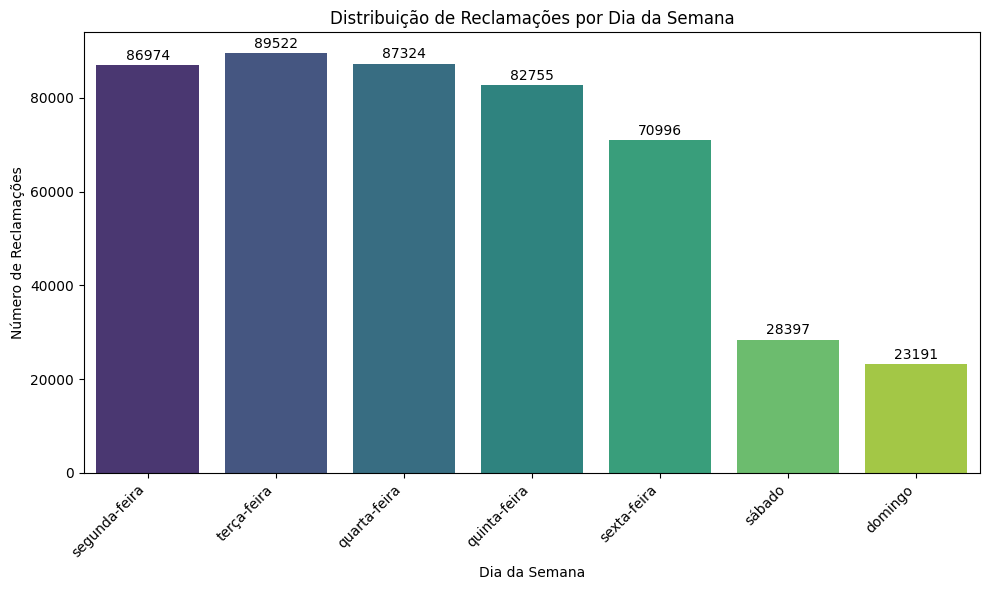

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import calendar

df_unico['report_date'] = pd.to_datetime(df_unico['report_date'], errors='coerce')

df_unico['dia_semana'] = df_unico['report_date'].dt.day_name()
traducao_dias = {
    'Monday': 'segunda-feira',
    'Tuesday': 'terça-feira',
    'Wednesday': 'quarta-feira',
    'Thursday': 'quinta-feira',
    'Friday': 'sexta-feira',
    'Saturday': 'sábado',
    'Sunday': 'domingo'
}
df_unico['dia_semana'] = df_unico['dia_semana'].map(traducao_dias)


reclamacoes_por_dia_semana = df_unico.dropna(subset=['dia_semana']).groupby('dia_semana').size().sort_values(ascending=False)

dia_mais_reclamacoes = reclamacoes_por_dia_semana.index[0]
qtd_dia = reclamacoes_por_dia_semana.values[0]

print(f"O dia da semana com o maior número de reclamações é {dia_mais_reclamacoes} com {qtd_dia} reclamações.")

reclamacoes_por_dia_semana_ordenado = df_unico.dropna(subset=['dia_semana']).groupby('dia_semana').size().reindex(traducao_dias.values())


plt.figure(figsize=(10, 6))
sns.barplot(x=reclamacoes_por_dia_semana_ordenado.index, y=reclamacoes_por_dia_semana_ordenado.values, palette='viridis')
plt.title('Distribuição de Reclamações por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Reclamações')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for index, value in enumerate(reclamacoes_por_dia_semana_ordenado.values):
    plt.text(index, value + 500, str(value), ha='center', va='bottom')

plt.savefig('reclamacoes_por_dia_semana.png')

plt.show()

Top 10 Empresas Mais Reclamadas:
name_company
Enel Distribuição São Paulo (Eletropaulo)    101596
Enel Distribuição Rio (Ampla)                 37474
Enel Distribuição Ceará (Coelce)              32792
Light                                         27074
CPFL Paulista                                 22276
Cemig                                         21383
Equatorial Maranhão (CEMAR)                   17902
Neoenergia Coelba                             16449
Equatorial Piauí                              16108
Sabesp                                        12941
Name: count, dtype: int64


/tmp/ipython-input-1130036070.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_empresas.values, y=top_10_empresas.index, palette='viridis', orient='h')


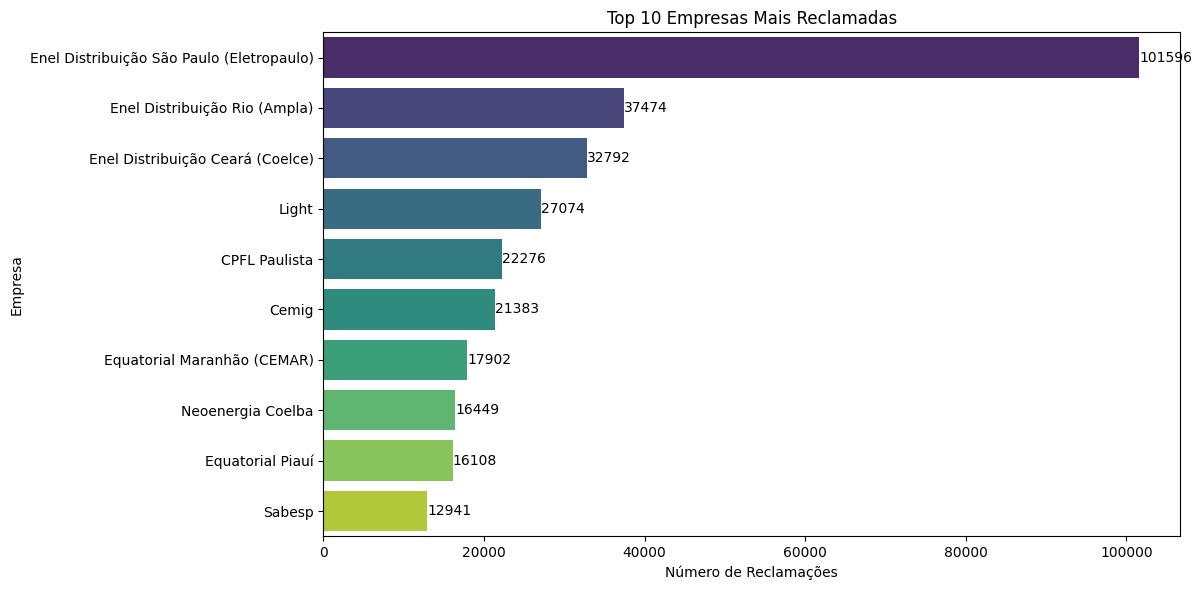

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

reclamacoes_por_empresa = df_unico['name_company'].value_counts()

top_10_empresas = reclamacoes_por_empresa.head(10)

print("Top 10 Empresas Mais Reclamadas:")
print(top_10_empresas)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_empresas.values, y=top_10_empresas.index, palette='viridis', orient='h')
plt.title('Top 10 Empresas Mais Reclamadas')
plt.xlabel('Número de Reclamações')
plt.ylabel('Empresa')
plt.tight_layout()

for index, value in enumerate(top_10_empresas.values):
    plt.text(value, index, str(value), ha='left', va='center')

plt.savefig('top_10_empresas_mais_reclamadas.png')

plt.show()

In [ ]:
df_unico.to_csv('consolidado_reclamacoes.csv', index=False)

Top 10 Empresas Menos Reclamadas:
name_company
Águas Colíder                                                       8
Águas de Paraty                                                     7
Cooperativa de Distribuição de Energia Fontoura Xavier - CERFOX     5
Cerpalo                                                             5
SAAE Barretos                                                       4
Cergal                                                              3
NOVA PALMA ENERGIA                                                  2
Chesp                                                               2
Pacto Energia - PR                                                  2
Águas Piquete                                                       1
Name: count, dtype: int64


/tmp/ipython-input-3657480558.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_10_empresas.values, y=bottom_10_empresas.index, palette='viridis', orient='h')


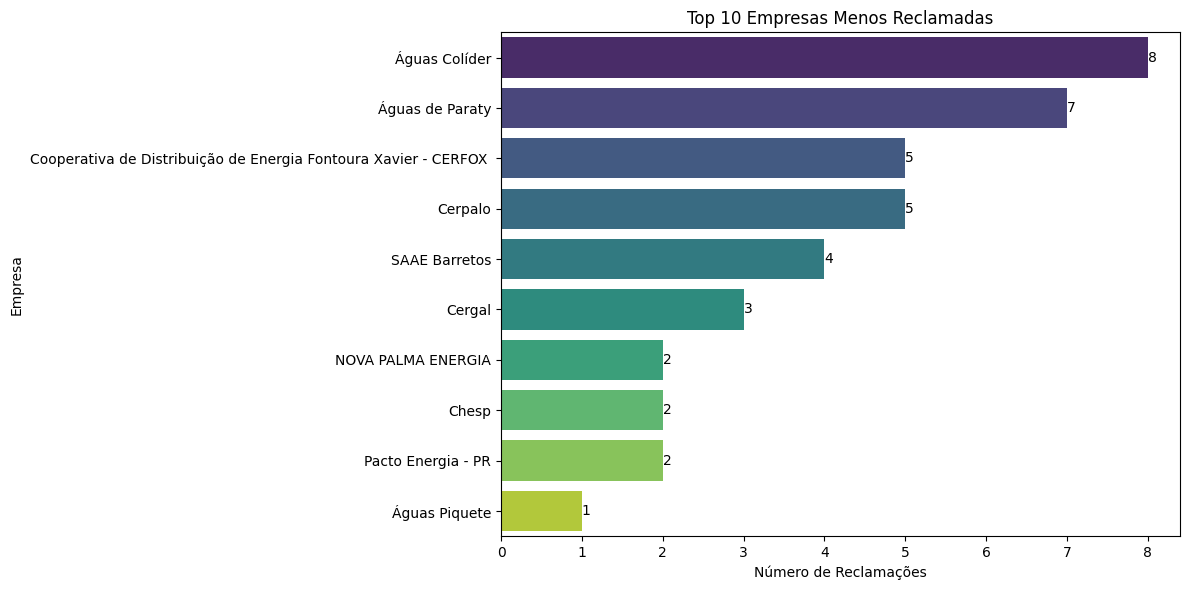

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

reclamacoes_por_empresa = df_unico['name_company'].value_counts()

bottom_10_empresas = reclamacoes_por_empresa.tail(10)

print("Top 10 Empresas Menos Reclamadas:")
print(bottom_10_empresas)

plt.figure(figsize=(12, 6))
sns.barplot(x=bottom_10_empresas.values, y=bottom_10_empresas.index, palette='viridis', orient='h')
plt.title('Top 10 Empresas Menos Reclamadas')
plt.xlabel('Número de Reclamações')
plt.ylabel('Empresa')
plt.tight_layout()

for index, value in enumerate(bottom_10_empresas.values):
    plt.text(value, index, str(value), ha='left', va='center')
plt.savefig('top_10_empresas_menos_reclamadas.png')

plt.show()

In [ ]:
reclamacoes_enel_equatorial = df_unico[
    df_unico['name_company'].str.contains('Enel|Equatorial', case=False, na=False)
]
total_reclamacoes_enel_equatorial = len(reclamacoes_enel_equatorial)

print(f"O número total de reclamações para Enel e Equatorial é: {total_reclamacoes_enel_equatorial}")

O número total de reclamações para Enel e Equatorial é: 117045


/tmp/ipython-input-1184310837.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reclamacoes_por_empresa_filtrada.index, y=reclamacoes_por_empresa_filtrada.values, palette='viridis')


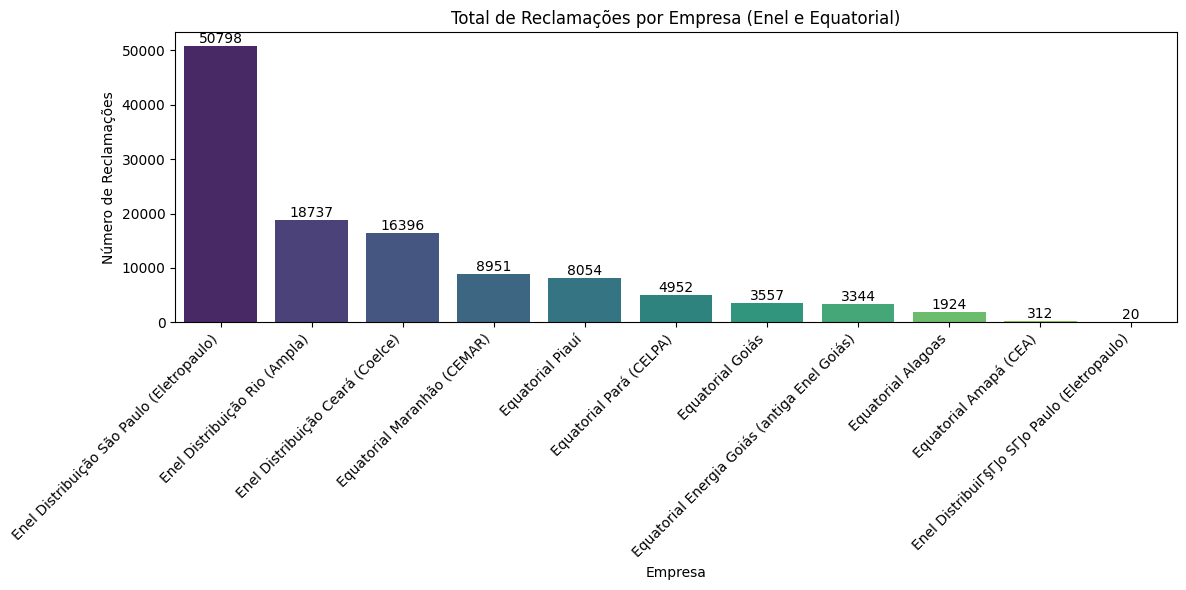

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
reclamacoes_por_empresa_filtrada = reclamacoes_enel_equatorial['name_company'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=reclamacoes_por_empresa_filtrada.index, y=reclamacoes_por_empresa_filtrada.values, palette='viridis')
plt.title('Total de Reclamações por Empresa (Enel e Equatorial)')
plt.xlabel('Empresa')
plt.ylabel('Número de Reclamações')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for index, value in enumerate(reclamacoes_por_empresa_filtrada.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.savefig('reclamacoes_enel_equatorial_por_empresa.png')

plt.show()

In [ ]:
print("Primeiras linhas do dataframe com reclamações da Enel e Equatorial:")
display(reclamacoes_enel_equatorial.head())

Primeiras linhas do dataframe com reclamações da Enel e Equatorial:


,name_company,report_status,report_text,report_date,report_place,reponse_company,reponse_company_date,service_note,consumer_consideration,dia_semana
484,Enel Distribuição Rio (Ampla),Resolvido,"Empresa colocou serviços nao contratados, que ...",2025-06-11,Teresópolis - RJ,"Olá, !Agradecemos o seu contato e a oportunida...",(1 dia(s) depois),5,"Resolvido mediante contato, a empresa informou...",quarta-feira
485,Enel Distribuição Rio (Ampla),Resolvido,Solicito negociação Procon Itaipuaçu,2025-06-10,Maricá - RJ,"Olá, Jose!Agradecemos o seu contato e a oportu...",(no mesmo dia),5,Excelente atendimento,terça-feira
486,Enel Distribuição Rio (Ampla),Resolvido,Solicito encerramento contratual da unidade 51...,2025-06-10,Maricá - RJ,"Olá, Mauricio!Agradecemos o seu contato e a op...",(no mesmo dia),5,Agradeço a Tábata pela rápida solução do meu p...,terça-feira
487,Enel Distribuição Rio (Ampla),Resolvido,Sou proprietário de um imóvel e gostaria de pa...,2025-06-09,Resende - RJ,"Olá, Alexandre!Agradecemos o seu contato e a o...",(3 dia(s) depois),5,atendente muito atenciosa resolveu com prontid...,segunda-feira
488,Enel Distribuição Rio (Ampla),Resolvido,Solicito encerramento contratual da unidade 57...,2025-06-09,Maricá - RJ,"Olá, José!Agradecemos o seu contato e a oportu...",(no mesmo dia),5,<não há comentários do consumidor>,segunda-feira


In [ ]:
reclamacoes_enel_equatorial.to_csv('reclamacoes_enel_equatorial.csv', index=False)

print("O dataframe com as reclamações da Enel e Equatorial foi exportado para 'reclamacoes_enel_equatorial.csv'")

O dataframe com as reclamações da Enel e Equatorial foi exportado para 'reclamacoes_enel_equatorial.csv'


In [ ]:
from google.colab import files
files.download('reclamacoes_enel_equatorial.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>